# <span style="color:#F72585">Optimización</span>

Gradiente Descendiente Estocástico

<figure>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/512px-3d-gradient-cos.svg.png" height='450' width='450'/>
</figure>

Fuente: [Wikipedia](https://commons.wikimedia.org/wiki/File:3d-gradient-cos.svg)

Por ejemplo busque en Google [ax.quiver](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.quiver.html).

## <span style="color:#4361EE">Introducción</span>

La mayoría de los algoritmos de aprendizaje profundo implican optimización de algún tipo. La optimización se refiere a la tarea de minimizar o maximizar alguna función $ f (x) $ alterando $ x $. Por lo general, expresamos la mayoría de los problemas de optimización en aprendizaje profundo en términos de minimizar una función $f(x)$.


**Entenderemos la frase  minimizar una función $f(x)$ como un procedimiento para encontrar valor $x^*$ de tal manera que $ f (x^*) $ tenga el menor valor posible.**

Los matemáticos escriben esta frase en símbolos de la siguiente manera:

$$
x^* = \underset{x}{\operatorname{argmin}}  f(x).
$$



La función que queremos minimizar  se llama función o criterio **objetivo**. Cuando estamos minimizando, también podemos llamarla función de costo, **función de pérdida** o función de error.


La búsqueda de un mínimo global puede ser una tarea muy dura en aprendizaje de máquinas si se tiene en cuenta que las funciones tienen muchas variables y consecuencia se tienen muchas dimensiones, por lo que no podemos *verlas*. En la siguiente imagen la función tiene dos variables **(features)**. En aprendizaje de máquinas se pueden tener cientos  miles y hasta más variables (features). La siguiente imagen muestra una función con varios máximos y varios mínimos. 

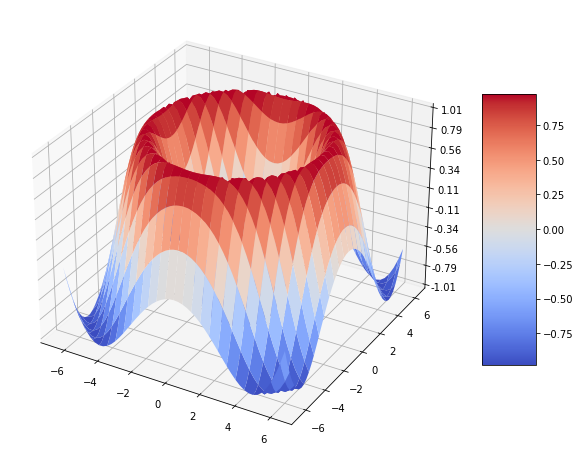

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,10))


# Datos.
X = np.arange(-6.5, 6.5, 0.25)
Y = np.arange(-6.5, 6.5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = -np.sin(R)

# Dibujar la superficie
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

# Configurar el eje z.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# Un StrMethodFormatter es usado automaticamente
ax.zaxis.set_major_formatter('{x:.02f}')

# Agrega una barra de colores que asigna valores a los colores.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## <span style="color:#4361EE">Métodos de optimización basados en el gradiente</span>

En esta lección vamos a concentrarnos en las técnicas más modernas de optimización desarrolladas para el hacer posible el aprendizaje de máquinas. En este contexto se tiene que:

**<center>El problema de entrenar una máquina es un problema de optimización.</center>**

A menudo minimizamos las funciones que tienen múltiples entradas: $ f: \mathbb{R}^n \to \mathbb {R} $. 

Para que el concepto de "minimización" tenga sentido, debe haber una sola salida (función escalar).  Para funciones con múltiples entradas, se hace uso del concepto de derivadas parciales. La derivada parcial $\frac{\partial}{\partial x_i} f(x)$  mide como cambia (la velocidad a la que cambia) $f$  cuando la variable $x_i$ crece o decrece desde el punto  $x$. 


El gradiente generaliza la noción de derivada al caso en que la derivada es con respecto a una dirección en el espacio. El gradiente de $ f $, denotado $ \nabla_xf (x) $,  es el vector que contiene todas las derivadas parciales. El elemento $ i $ del gradiente es la derivada parcial de $ f $ con respecto a $ x_i $.



En múltiples dimensiones, los *puntos críticos* son puntos donde cada elemento del gradiente es igual a cero. Por otro lado, se puede verificar que el gradiente $ \nabla_xf (x) $  es ese  vector que apunta en la dirección en la cual la función $f$ crece más rápidamente partiendo precisamente del punto $x$. En consecuencia, $ -\nabla_xf (x) $ apunta en la dirección contraria, es decir en la dirección hacia la cual la función decrece más rápido, desde el punto $x$. Esta es la clave de los métodos de optimización basados en el gradiente. 

La siguiente imagen ilustra el gradiente proyectado en el plano $xy$ de la función $f(x,y)= -(\cos x^2 + \sin x^2)^2$.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/512px-3d-gradient-cos.svg.png" height='450' width='450'/>
</center>
</figure>


Gradientes de la función $f(x,y)= -(\cos x^2 + \sin x^2)^2$ proyectados en el plano $xy$

Fuente: [Wikipedia](https://commons.wikimedia.org/wiki/File:3d-gradient-cos.svg)

El término **gradiente descendiente** indica que se usará $ -\nabla_xf (x) $ para moverse a un siguiente punto en busca de un mínimo local. El método general se escribe como:

$$
x^{(k+1)} = x^{(k)} − \eta_{k} \nabla_x f(x^{(k)})
$$


Los  valores  $\eta_k$ se denominan genéricamente  **tasa de aprendizaje**. La razón de incorporar la tasa de aprendizaje es controlar el tamaño de paso. Si no hace esta corrección podemos alejarnos en lugar de acercarnos al mínimo que se está buscando.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/350px-Gradient_descent.svg.png" height='300' width='300'/>
</center>
</figure>

Ilustración usando curvas de nivel de como ocurren las iteraciones en el método del gradiente descendiente.

Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Gradient_descent.svg)

## <span style="color:#4361EE">Gradiente descendiente en lote</span>


En el método de gradiente  descendiente vainilla (vainilla se refiere al ejemplo básico), también conocido como descenso de gradiente por lotes, calcula el gradiente de la función de pérdida con respecto a los parámetros $\boldsymbol{\theta}$ para el **conjunto de datos de entrenamiento completo** $(\mathbf{x}_{train},\mathbf{y}_{train})$. Si $\mathfrak{L}$ es la función de pérdida del problema, entonces se tiene que 

$$
\boldsymbol{\theta}_{k+1} =  \boldsymbol{\theta}_k - \eta_k \nabla_{\boldsymbol{\theta}} \mathfrak{L}(\mathbf{x}_{train},\mathbf{y}_{train},\boldsymbol{\theta}_k),
$$


El principal problema a resolver con los métodos de gradiente descendiente es cómo definir y actualizar en cada paso la tasa de aprendizaje $\eta_k $. Un fragmento de código, en el cual se actualiza la tasa de aprendizaje podría lucir como sigue. Supongamos que al comenzar $0<\eta_0<1$. 

In [2]:
def gd(theta, x_train, y_train, loss_func, epochs):
    for i in range (epochs):
        gradient = evaluate_gradient(loss_func, x_train, y_train, theta)
        theta -=  eta * gradient
        eta   *= eta
    return theta, gradient

## <span style="color:#4361EE">Gradiente descendiente estocástico</span>

El descenso de gradiente estocástico (SGD), por el contrario, realiza una actualización de parámetros para cada ejemplo de entrenamiento $x_{train}^{(i)} $ y etiqueta $ y_{train}^ {(i)} $, **seleccionados al azar en cada época**.


$$
\boldsymbol{\theta}_{k+1} =  \boldsymbol{\theta}_k - \eta_k \nabla_{\boldsymbol{\theta}} \mathfrak{L}({x}_{train}^{(i)},{y}_{train}^{(i)},\boldsymbol{\theta}_k),
$$


En el artículo original de [Robbins and Monro (1951)](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586) $\eta$ cambia en cada iteración como acabamos de mostrar y se asume que  $\{\eta_k\}$ es una sucesión tal que $\sum_k \eta_k = \infty$, and $\sum_k \eta_k^2 < \infty$. Por ejemplo, se puede escoger $\eta_k = 1/k$. Robbins y Monro demostraron que bajo condiciones muy generales este algoritmo converge a la solución de problema, con probabilidad 1. 

Un fragmento de código del algoritmo de Robbins and Monro podría lucir como sigue.

In [3]:
def sgd(theta, data_train, loss_func, epochs):
    for i in range (epochs):
        np.random.shuffle (data)
        for example in data:
            x, y = example
            gradient = evaluate_gradient(loss_func,x, y, theta )
            theta = theta - eta * gradient
            eta *= eta
    return theta, gradient

## <span style="color:#4361EE">Gradiente descendiente estocástico por mini-lotes</span>


El descenso de gradiente por mini-lotes finalmente toma lo mejor de los dos mundos anteriores y realiza una actualización para cada mini-lote de $n$ ejemplos de entrenamiento:


$$
\boldsymbol{\theta}_{k+1} =  \boldsymbol{\theta}_k - \eta_k \nabla_{\boldsymbol{\theta}} \mathfrak{L}(\mathbf{x}_{train}^{(i:i+n)},\mathbf{y}_{train}^{(i:i+n)},\boldsymbol{\theta}_k),
$$



Desde este punto de la lección, asumiremos que **tomamos mini-lotes**, por lo que omitimos súper-índices en los datos $(\mathbf{x}_{train}^{(i:i+n)},\mathbf{y}_{train}^{(i:i+n)})$ en todas las expresiones.

Un fragmento de código para este método podría lucir como sigue:

In [4]:
def sgd_mini_batch(theta, data_train, loss_func, epochs, batch_size):
    for i in range (epochs):
        np.random.shuffle (data_train)
        for batch in get_batches(data_train , batch_size = batch_size):
            x, y = batch
            gradient = evaluate_gradient(loss_func,x, y, theta )
            theta -=  eta * gradient
            eta *= eta
    return theta, gradient

```{admonition} Nota
El tamaño de los mini-lotes depende del problema y puede ser 32, 64, 128, etc. En el ejemplo,  *get\_batches()* es una función generadora que va entregando lotes de datos a la medida que el algoritmo los requiere. Para las TPU se esperan mini-lotes de tamaño que sea múltiplo de 128.
```

### <span style="color:#4CC9F0">Discusión</span>

El método vainilla del descenso de gradiente  no garantiza una buena convergencia, y ofrece algunos desafíos que deben abordarse:

1. Elegir un ritmo de aprendizaje adecuado puede resultar complicado. Una tasa de aprendizaje demasiado pequeña conduce a una convergencia dolorosamente lenta, mientras que una tasa de aprendizaje demasiado grande puede dificultar la convergencia y hacer que la función de pérdida fluctúe alrededor del mínimo o incluso diverja.
2. Los horarios de actualización de la tasa de aprendizaje intentan ajustar la tasa de aprendizaje durante la entrenamiento, es decir, reducir la tasa de aprendizaje de acuerdo con un programa predefinido o cuando el cambio función de pérdida entre épocas cae por debajo de un umbral. Sin embargo, estos horarios y umbrales deben definirse con anticipación por lo que no pueden adaptarse a las características de un conjunto de datos.
3. Además, la misma tasa de aprendizaje se aplica a todas las actualizaciones de parámetros. Si nuestros datos son escasos y los valores de nuestras variables (características) tienen frecuencias muy diferentes, es posible que no queramos actualizarlas todas en la misma medida, sino realizar una actualización más grande para las características que ocurren con poca frecuencia.
4. Otro desafío clave al minimizar las funciones de error altamente no convexas comunes para las redes neuronales es evitar quedar atrapado en sus numerosos mínimos locales sub-óptimos. Algunos autores argumentan que, de hecho, la dificultad no surge de los mínimos locales sino de los puntos de silla, es decir, puntos donde una dimensión se inclina hacia arriba y otra hacia abajo. Estos puntos de silla suelen estar rodeados por una meseta del mismo error, lo que dificulta notablemente el escape de SGD, ya que el gradiente es cercano a cero en todas las dimensiones.

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/Gradient_ascent_chair.png" height='450' width='450'/>
</center>
</figure>

Ejemplo de un punto de silla.

Fuente: [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Gradient_ascent_(surface).png)

Para una revisión contemporáneas de los algoritmos de optimización modernos puede consultar [An overview of gradient descent optimization
algorithms](https://arxiv.org/pdf/1609.04747.pdf).

[Visualización SGD en Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Gradient_Descent_Example_Nonlinear_Equations.gif)

## <span style="color:#4361EE">Método del momento</span>


SGD tiene problemas para navegar por los barrancos, es decir, áreas donde la superficie se curva mucho más abruptamente en una dimensión que en otra, que son comunes en los óptimos locales. En estos escenarios, SGD oscila a lo largo de las pendientes del barranco mientras solo avanza vacilante por el fondo hacia el óptimo local.

 El método del momento ayuda a acelerar SGD en la dirección relevante y amortigua oscilaciones. Lo hace sumando una fracción $\lambda$ del vector de actualización del paso anterior al vector de actualización actual. 
 
El método  se esquematiza como sigue

$$
\begin{align}
\mathbf{v}_k &= \lambda \mathbf{v}_{k-1} +  \eta \nabla_{\boldsymbol{\theta}} \mathfrak{L}({x}_{train}^{(i)},{y}_{train}^{(i)},\boldsymbol{\theta}_k)\\
\theta_{k+1} &= \theta_{k} - v_k,
\end{align}
$$
$\lambda<1$. Usualmente, $\lambda= 0.9$.

## <span style="color:#4361EE">RMSprop</span>

Desarrollado por Goeff Hinton, no publicado. Se basa en dividir la tasa de aprendizaje en cada caso por un promedio del cuadrado de las componentes del gradiente en el paso anterior. Por cada componente $\theta$ del vector de parámetros $\boldsymbol{\theta}$, sea $g$ la respectiva componente del gradiente asociada a $\theta$, entonces el métodos es como sigue:

1. $E[g^2]_t= \lambda E[g^2]_{t-1} + (1-\lambda)g_t^2$
2. $\theta_{t+1} = \theta_t - \tfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}}g_t$

$\epsilon >0$ es para evitar divisiones por cero. 

- $\lambda$ es el parámetro de decaimiento. Típicamente $\lambda = 0.9$.
- $\eta$ es la tasa de aprendizaje. Típicamente el valor por defecto es 0.001.


## <span style="color:#4361EE">Algoritmo Adam</span>

El algoritmo [Adam a method for Stochastic optimization](https://arxiv.org/pdf/1412.6980.pdf) de Kingma y Lei es actualmente el método más utilizado. El siguiente es el algoritmo.

El símbolo  $g^2_t$ indica los elementos del producto de Hadamard (componente por componente)  $g_t\bigodot g_t$. Según los autores, los mejores resultados han sido obtenidos para los valores de los hiperparámetros  $\alpha = 0.001$, $\beta_1 = 0.9$, $\beta_2 = 0.999$ y $\epsilon = 10−8$. Todas operaciones entre vectores son hechas componente por componente (producto de Hadamard). con $\beta_1^t$ and $\beta_2^t$ se denota la potencia $t$-ésima.
1. Requerido: $\alpha$: Valor de salto (Stepsize)
2. Requerido: $\beta_1^t$ y $\beta_2^t \in [0, 1)$. Ratas de decaimiento exponencial para la estimación de los momentos.
3. Requerido: $f(\theta)$: Función de pérdida objetivo con parámetros $\theta$.
4. Requerido: $\theta_0$: Vector de valores iniciales del vector de parámetros.
5.  $m_0  = 0$ (Inicialización del vector momento de primer orden).
6. $v_0 =  0$ (Inicialización del vector momento de segundo orden).
7. $t =  0$ (Inicialización del contador de iteraciones).
8. Mientras $(||\theta_t - \theta_{t-1}||>\delta$) (Mientras no haya covergencia repita los siguientes pasos:)


$$ \begin{align*}
t  &= t + 1 \\
g_t &=  \nabla f_t(\theta_{t-1}) \text{ (Obtenga los gradientes de la función de pérdida en el paso $t$ con respeto a los parámetros)}\\
m_t  &= \beta_1 m_{t−1} + (1 − \beta_1) · g_t \text{ (Actualice la estimación del vector de  momentos de primer orden)}\\
v_t  &= \beta_2 v_{t−1} + (1 − \beta_2) · g_t^2 \text{ (Actualice la estimación del vector de  momentos de segundo orden)}\\
\hat{m}_t  &= \frac{m_t}{1 − \beta_1^t}   \text{ (Calcule la corrección de sesgo de la estimación del vector de momentos de primer orden)}\\ 
\hat{v}_t  &=  \frac{v_t}{1 − \beta_2^t}  \text{ (Calcule la corrección de sesgo de la estimación del vector de momentos de segundo orden)}\\ 
\theta_t &=   \theta_{t-1}  - \alpha  \frac{\hat{m}_t}{\hat{v}_t + epsilon} \text{ (Actualice los parámetros)}\\
\end{align*}
$$
 
fin mientras

return $\theta_t$ (Parámetros resultantes)

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Libro-Fundamentos/main/Fundamentacion_Matematica/Imagenes/Adam_MsProp.png" height='500' width='500'/>
</center>
</figure>

Comparación de los diferentes métodos de gradiente descendiente estocástico

Fuente: Alvaro Montenegro

## <span style="color:#4361EE">Referencias</span>

1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2021](https://github.com/AprendizajeProfundo/Diplomado)
1. [Alvaro Montenegro, Daniel Montenegro y Oleg Jarma, Inteligencia Artificial y Aprendizaje Profundo Avanzado, 2022](https://github.com/AprendizajeProfundo/Diplomado-Avanzado)